In [5]:
def statefunction(state, f):
    out = state[0]    
    outlist = list(state)
    outlist.append(f(state))
    outlist = tuple(outlist[1:])
    return [out,outlist]

In [6]:
def p1f(s):
    return (s[0]*s[1] + s[2]*s[3] + 1 )%2

In [7]:
def allstates(n):
    #create a list of all binary states of length n
    if n == 1:
        return [(0,),(1,)]
    else:
        statelist = []
        for s in allstates(n-1):
            l = list(s)
            l2 = list(s)
            statelist = statelist + [tuple(l+ [1])] + [tuple(l2 + [0])]
        
        return statelist

In [8]:
def make_statediag(n, func):
    #return a dictionary representing the state diagram of an n-state register with feedback fn f
    states = allstates(n)
    d = {}
    for state in states:
        d[state] = [statefunction(state,func)[1]]
    return d

In [9]:
def make_stategraph(n,func):
    d = make_statediag(n, func)
    return DiGraph(d)

In [10]:
D =make_stategraph(4, p1f)

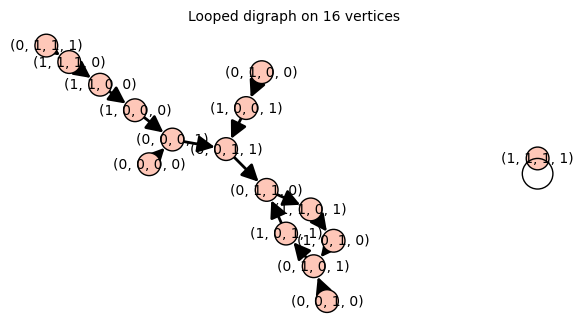

In [11]:
D

In [12]:
def f2(s):
    return (s[0] + s[1])%2

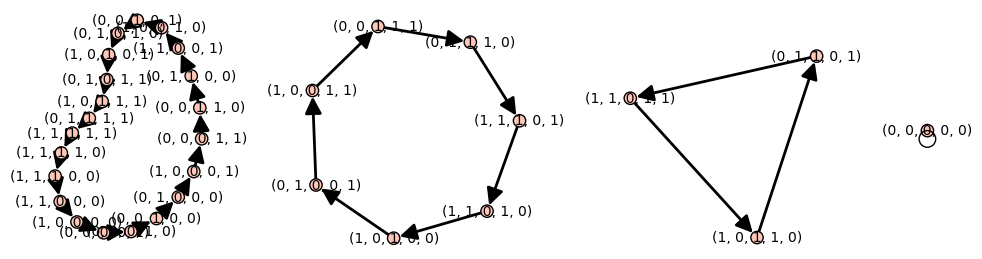

In [13]:
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = [10,10]
D2 =make_stategraph(5, f2)
D2.show()

In [14]:
def runlfsr(init, func, max_iters):
    l = [init[0]]
    runs = 0
    newstate = init
    while runs < max_iters:
        newstate = statefunction(newstate, func)[1]
        out = statefunction(newstate, func)[0]
        l = l + [out]
        runs += 1
    return l

In [15]:
print(runlfsr([0,1,0,0,0], f2, 50))

[0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]


In [16]:
def allstates3(n):
    #create a list of all states of length n over F3
    if n == 1:
        return [(0,),(1,), (2,)]
    else:
        statelist = []
        for s in allstates3(n-1):
            l = list(s)
            l2 = list(s)
            l3 = list(s)
            statelist = statelist + [tuple(l+ [1])] + [tuple(l2 + [0])] + [tuple(l2 + [2])]
        
        return statelist

In [17]:
def f3(s):
    return (2*s[0] % 3)

In [18]:
def f4(s):
    return (s[1] + s[0])%3

In [19]:
def make_3statediag(n, func):
    #return a dictionary representing the state diagram of an n-state register with feedback fn f
    states = allstates3(n)
    d = {}
    for state in states:
        d[state] = [statefunction(state,func)[1]]
    return d

In [20]:
runlfsr([1,1], f3, 10)

[1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2]

In [21]:
def make_3stategraph(n,func):
    d = make_3statediag(n, func)
    return DiGraph(d)

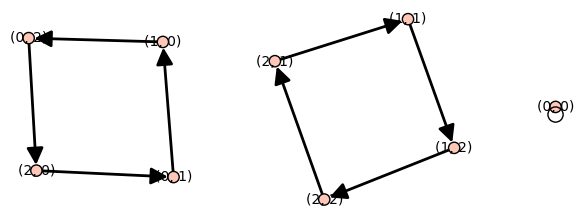

In [22]:
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = [6,6]
D3 =make_3stategraph(2, f3)
D3.show()

In [23]:
runlfsr([1,1], f4, 10)

[1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2]

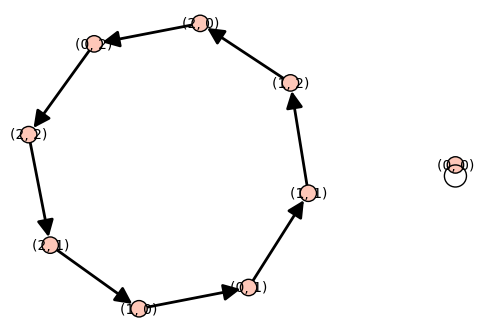

In [24]:
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = [5,5]
D4 =make_3stategraph(2, f4)
D4.show()

In [25]:
def f5(s):
    return (s[0] + 2*s[2])%3

In [26]:
seq = runlfsr([0,1,2], f5,109)
print(seq)

[0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2]


In [27]:
def decimate(l,s):
    new = []
    for i in range(0,len(l)/s):
        new = new + [l[s*i]]
    return new        

In [28]:
decimate(seq, 11)

[0, 1, 1, 1, 2, 1, 1, 0, 0, 1]

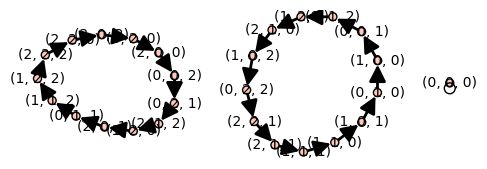

In [29]:
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = [5,5]
D5 =make_3stategraph(3, f5)
D5.show()

In [291]:
def g5(s):
    return ((s[0]+ s[2]+ s[1]*s[2]*s[3] + 1 ) % 2)


In [292]:
runlfsr([1,1,1,1], g5,25)

[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]

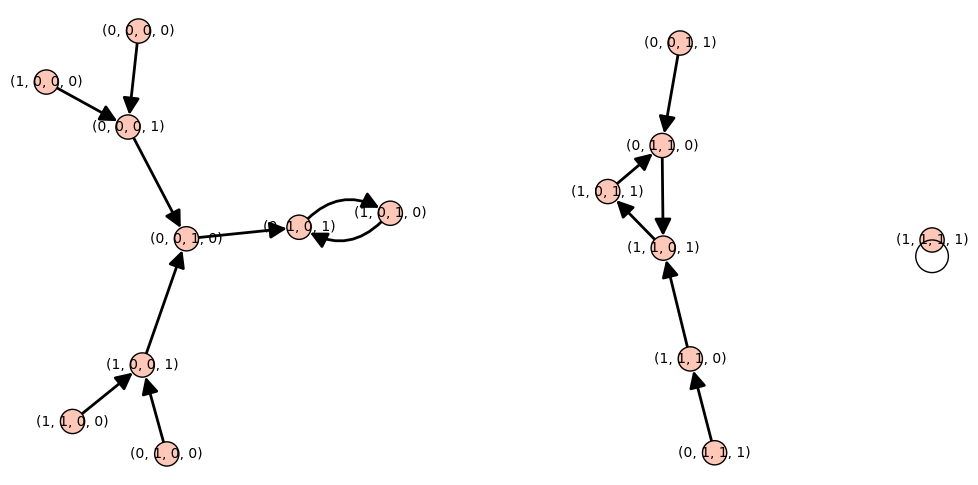

In [268]:
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = [10,10]
D2 =make_stategraph(4, g5)
D2.show()